### **7. LightGBM**

* XGBoost 대비 **장점**:
  * 더 빠른 학습과 예측 수행 시간
  * 더 작은 메모리 사용량
  * 카테고리형 피처의 자동 변환과 최적 분할 (원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)
* 단점: 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움 -  10,000건 이하의 데이터 세트(LightGBM 공식 문서)
* LightGBM과 XGBoost의 예측 성능은 별다른 차이가 없으며 기능상의 다양성은 LightGBM이 약간 더 많음

* 일반 GBM 계열의 트리 분할 방법과 다르게 **LightGBM은 리프 중심 트리 분할(Leaf Wise) 방식**을 사용
  * 균형 트리 분할(Level Wise) 방식: 기존의 대부분 트리 기반 알고리즘이 사용하는 방식으로, 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 트리가 최소화 될 수 있음. 이를 통해 오버피팅에 보다 강한 구조를 가질 수 있지만, 반대로 균형을 맞추기 위한 시간이 필요하다는 상대적 단점이 존재
  * **리프 중심 트리 분할(Leaf Wise) 방식**: 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊고 비대칭적인 트리를 생성함. 학습을 반복할수록 결국 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있음

* 파이썬 패키지명은 lightgbmj
* lightgbm 패키지 내에 파이썬 래퍼용 LightGBM과 <u>사이킷런 래퍼 LightGBM 모듈</u>을 모두 가지고 있음
* 분류를 위한 LGBMClassifier 클래스와 회귀를 위한 LGBMRegressor 클래스

#### 1. LightGBM 설치

#### 2. LightGBM 하이퍼 파라미터
&nbsp;LightGBM 하이퍼 파라미터는 XGBoost와 많은 부분이 유사함. LightGBM은 XGBoost와 다르게 리프 노드가 계속 분할되면서 트리의 깊이가 깊어지므로 이러한 트리 특성에 맞는 하이퍼 파라미터 설정이 필요함 (예: max_depth를 매우 크게 가짐)
* 주요 파라미터
|||
|:-:|-|
|**num_iterations** <br/>\[default = 100]|반복 수행하려는 트리의 개수를 지정함. 크게 지정할수록 예측 성능이 높아질 수 있으나, 너무 크게 지정하면 오히려 과적합으로 성능이 저하될 수 있음|
|**learning_rate** <br/>\[default = 0.1]|0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. 일반적으로 n_estimators를 크게 하고 learning_rate를 작게 해서 예측 성능을 향상시킬 수 있으나, 과적합 이슈와 학습 시간이 길어지는 부정적인 영향도 고려해야 함|
|**max_depth** <br/>\[default = -1]|0보다 작은 값을 지정하면 깊이에 제한이 없음|
|**min_data_in_leaf** <br/>\[default = 20]|최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수. 과적합을 제어하기 위한 파라미터|
|**num_leaves** <br/>\[default = 31]|하나의 트리가 가질 수 있는 최대 리프 개수|
|**boosting** <br/>\[default = gbdt]|부스팅 트리를 생성하는 알고리즘을 기술 <br/>&nbsp;* gbdt: 일반적인 그래디언트 부스팅 결정 트리 <br/>&nbsp;* rf: 랜덤 포레스트|
|**bagging_fraction** <br/>\[default = 1.0]|트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정|
|**feature_fraction** <br/>\[default = 1.0]|개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율. 과적합을 막기 위해 사용됨|
|**lambda_l2** \[default = 0.0]|L2 regulation 제어를 위한 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음|
|**lambda_l1** <br/>\[default = 0.0]|L1 regulation 제어를 위한 값. L2와 마찬가지로 과적합 제어를 위함|
* Learning Task 파라미터
|||
|:-:|-|
|**objective**|최솟값을 가져야 할 손실함수를 정의. 애플리케이션 유형, 즉 회귀, 다중 클래스 분류, 이진 분류인지에 따라서 지정|

#### 3. 하이퍼 파라미터 튜닝 방안
* num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안
  * <u>num_leaves</u>: LightGBM 모델의 복잡도를 제어하는 주요 파라미터. 일반적으로 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델이 복잡도가 커져 과적합 영향도가 커짐
  * <u>min_data_in_leaf</u>: 과적합을 개선하기 위한 중요 파라미터. num_leaves와 학습 데이터의 크기에 따라 달라지지만, 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지
  * <u>max_depth</u>: 명시적으로 깊이의 크기를 제한. num_leaves, min_data_in_leaf와 결합해 과적합을 개선하는 데 사용
* learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 방안
  * n_estimators를 너무 크게 하는 것은 과적합으로 오히려 성능이 저하될 수 있음을 유념

&nbsp;이 밖에 과적합 제어를 위해 reg_lambda, reg_alpha와 같은 regularization을 적용하거나 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 개수를 줄이기 위해 colsample_bytree, subsample 파라미터를 적용할 수 있음

#### 4. 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

|파이썬 래퍼 LightGBM|사이킷런 래퍼 LightGBM|사이킷런 래퍼 XGBoost|
|-|-|-|
|num_iterations|n_estimators|n_estimators|
|learning_rate|learning_rate|learning_rate|
|max_depth|max_depth|max_depth|
|min_data_in_leaf|min_child_samples|N/A|
|bagging_fraciton|subsample|subsample|
|feature_fraction|colsample_bytree|colsample_bytree|
|lambda_l2|reg_lambda|reg_lambda|
|lambda_l1|reg_alpha|reg_alpha|
|early_stopping_round|early_stopping_rounds|early_stopping_rounds|
|num_leaves|num_leaves|N/A|
|min_sum_hessian_in_leaf|min_child_weight|min_child_weight|

#### 5. LightGBM 적용 – 위스콘신 유방암 예측
* LightGBM도 XGBoost와 동일하게 조기 중단(early stopping)이 가능
  * LGBMClassifier의 fit()에 조기 중단 관련 파라미터를 설정

In [16]:
import lightgbm

print(lightgbm.__version__)

3.3.5


**n_estimators = 400, early_stopping_rounds = 50 으로 설정하고 위스콘신 유방암 데이터 세트를 LightGBM으로 예측**

In [17]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

→ 조기 중단으로 111번 반복까지만 수행하고 학습을 종료

**학습된 LightGBM 모델을 기반으로 예측 성능을 평가**

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
 F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [19]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9877


**피처 중요도 시각화 plot_importance()**  
&nbsp;LightGBM 파이썬 패키지인 lightgbm은 xgboost와 동일하게 피처 중요도를 시각화할 수 있는 내장 API를 제공함. 사이킷런 래퍼 클래스를 입력해도 시각화를 제공함

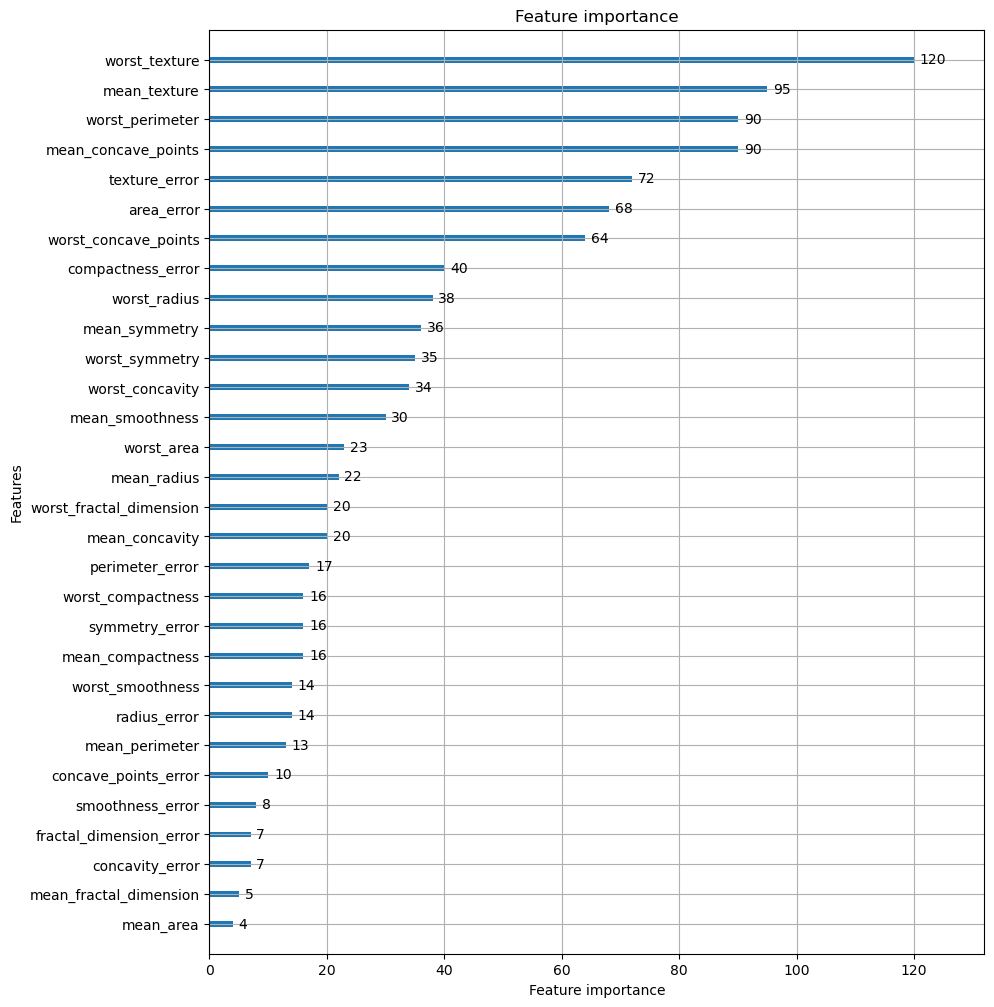

In [20]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)
plt.savefig('lightgbm_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

### **8. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝**

* 지금까지 하이퍼 파라미터 튜닝을 위해 적용한 사이킷런의 Grid Search 방식은 튜닝해야 할 하이퍼 파라미터 개수가 많을 경우 최적화 수행 시간이 오래 걸린다는 단점이 있음
  * 개별 하이퍼 파라미터 값의 범위가 넓거나 학습 데이터가 대용량일 경우 최적화 시간이 더욱 늘어남
* XGBoost나 LightGBM은 성능이 매우 뛰어난 알고리즘이지만, 하이퍼 파라미터의 개수가 다른 알고리즘에 비해서 많음

→ 위와 같은 LightGBM의 6가지 하이퍼 파라미터를 최적화하려는 시도에서 Grid Search 방식은 5\*4\*5\*5\*4\*3 = 6000회에 걸쳐서 반복적으로 학습과 평가를 수행해야만 하기에 수행 시간이 매우 오래 걸릴 수 밖에 없음  
→ 때문에 하이퍼 파라미터 개수를 줄이거나 개별 하이퍼 파라미터의 범위를 줄여야 함  
→ **실무의 대용량 학습 데이터**에 XGBoost나 LightGBM의 하이퍼 파라미터 튜닝 시에 Grid Search 방식보다는 **베이지안 최적화 기법**을 적용하곤 함

#### 1. 베이지안 최적화 개요
: 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식
* $f(x, y) = 2x - 3y$가 있다고 하면 $f(x, y)$의 반환 값을 최대/최소로 하는 $x, y$값을 찾아내는 것
* <u>함수 식 자체를 알 수 없고, 단지 입력값과 반환값만 알 수 있는 상황</u>에서 함수 반환값의 최대/최소 값을 찾기안 매우 어려움. <u>함수 식 자체가 복잡하고, 입력값들의 개수가 많거나 범위가 넓은 경우</u>에는 입력값을 순차적으로 대입해서는는 결코 짧은 시간 안에 최적 입력값을 찾을 수 없음  
→ <u>베이지안 최적화</u>를 이용해 쉽고 빠르게 최적 입력값을 찾을 수 있음

* 베이지안 확률에 기반을 두고 있는 최적화 기법
  * 새로운 사건의 관측이나 새로운 샘플 데이터를 기반으로 사후 확률을 개선해 나감
* 베이지안 최적화는 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만들어 냄

* **베이지안 최적화를 구성하는 두 가지 중요 요소**
  * **대체 모델(Surrogate Model)**: 획득 함수로부터 최적 함수를 예측할 수 있는 입력값을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선해 나감  
    <span style="color: #C0C0C0">→ 최적 함수를 추정할 때 사용할 수 있는 알고리즘: 일반적으로 가우시안 프로세스(Gaussian Process), 후술할 HyperOpt는 트리 파르젠 Estimator(TPE, Tree-structure Parzen Estimator)를 사용</span>
  * **획득 함수(Acquisition Function)**: 개선된 대체 모델을 기반으로 최적 입력값을 계산 → 하이퍼 파라미터   
* 대체 모델은 획득 함수가 계산한 하이퍼 파라미터를 입력받으면서 점차적으로 개선되며, 개선된 대체 모델을 기반으로 획득 함수는 더 정확한 하이퍼 파라미터를 계산할 수 있게 됨

* 베이지안 최적화 단계  
  **Step 1**: 최초에는 랜덤하게 하이퍼 파라미터들을 샘플링하고 성능 결과를 관측함  
  **Step 2**: 관측된 값을 기반으로 대체 모델은 최적 함수를 추정함 <br/>&nbsp;* 신뢰 구간: 추정된 함수의 결괏값 오류 편차를 의미하며 추정 함수의 불확실성을 나타냄<br/>&nbsp;* 최적 관측값: y축 value에서 가장 높은 값을 가질 때의 하이퍼 파라미터  
  **Step 3**: 추정된 최적 함수를 기반으로 획득 함수는 다음으로 관측할 하이퍼 파라미터 값을 계산함. 이전의 최적 관측값보다 더 큰 최댓값을 가질 가능성이 높은 지점을 찾아서 다음에 관측할 하이퍼 파라미터를 대체 모델에 전달함  
  **Step 4**: 획득 함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델은 갱신되어 다시 최적 함수를 예측 추정함

→ Step 3, 4를 특정 횟수만큼 반복하게 되면 대체 모델의 불확실성이 개선되고 점차 정확한 최적 함수 추정이 가능

#### 2. HyperOpt 사용하기
* 베이지안 최적화를 머신러닝 모델의 하이퍼 파라미터 튜닝에 적용할 수 있게 제공되는 파이썬 패키지에 대표적으로 HyperOpt, Bayesian Optimization, Optuna 등이 있음

In [21]:
#pip install hyperopt

In [22]:
import hyperopt

print(hyperopt.__version__)

0.2.7


* HyperOpt를 활용하는 주요 로직
  1) 입력 변수명과 입력값의 검색 공간(Search Space) 설정
  2) 목적 함수(Objective Function)의 설정
  3)  목적 함수의 반환 최솟값을 가지는 최적 입력값을 유추
* HyperOpt를 사용할 때 유의할 점
  * 다른 패키지와는 다르게 목적 함수 반환 값의 최댓값이 아닌 **최솟값을 가지는 최적 입력값**을 유추한다는 것

**1. HyperOpt의 hp 모듈을 이용하여 입력 변수명과 입력값의 검색 공간을 설정**
* 입력 변수명과 입력값 검색 공간은 파이썬 딕셔너리 형태로 설정되어야 함
  * key: 입력 변수명
  * value: 해당 입력 변수의 검색 공간
* hp 모듈은 입력값의 검색 공간을 다양하게 설정할 수 있도록 여러 가지 함수를 제공함
  |||
  |-|-|
  |**hp.quniform**(label, low, high, q)|label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최댓값 high까지 q의 간격을 가지고 설정|
  |**hp.uniform**(label, low, high)|최솟값 low에서 최댓값 high까지 정규 분포 형태의 검색 공간 설정|
  |**hp.randint**(label, upper)|0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정|
  |**hp.loguniform**(label, low, high)|exp(uniform(low,high))값을 반환하며, 반환 값의 log 변환 된 값은 정규 분포 형태를 가지는 검색 공간 설정|
  |**hp.choice**(label, options)|검색 값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정. Options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_criterion', \['gini', 'entropy'])과 같이 설정하면 입력 변수 tree_criterion의 값을 'gini'와 'entropy'로 설정하여 입력함|

In [23]:
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1) }

→ 입력 변수 x는 -10부터 10까지 1의 간격을 가지는 값들을 가짐 (순차적으로 입력되지는 않음)

**2. 목적 함수 생성**
* 목적 함수는 반드시 변숫값과 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환하는 구조로 만들어져야 함
* 반환값은 숫자형 단일값 외에도 딕셔너리 형태로 반환할 수 있음
  * 딕셔너리 형태로 반환할 경우에는 {'loss':retval, 'status':STATUS_OK} 와 같이 loss와 status 키 값을 설정해서 반환

In [24]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

**3-1. 목적 함수의 반환값이 최소가 될 수 있는 최적의 입력값 찾기**
* HyperOpt는 이 기능을 수행할 수 있도록 **fmin(objective, space, algo, max_evals, trials)** 함수를 제공함
  * **fn**: 위에서 생성한 objective_func와 같은 목적 함수
  * **space**: 위에서 생성한 search_space와 같은 검색 공간 딕셔너리
  * **algo**: 베이지안 최적화 적용 알고리즘. 기본적으로 tpe.suggest이며 이는 HyperOpt의 기본 최적화 알고리즘인 TPE(Tree of Parzen Estimator)를 의미
  * **max_evals**: 최적 입력값을 찾기 위한 입력값 시도 횟수
  * **trials**: 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용. Trials 클래스를 객체로 생성한 변수명을 입력함
  * **rstate**: fmin()을 수행할 때마다 동일한 결괏값을 가질 수 있도록 설정하는 랜덤 시드(seed) 값

In [25]:
from hyperopt import fmin, tpe, Trials
import numpy as np

# 입력 결괏값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1575.15trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


→ 입력 변수 x의 공간 -10 ~ 10, y의 공간 -15 ~ 15에서 목적 함수의 반환값을 $x^2 - 20y$로 설정했으므로 x는 0에 가까울수록, y는 15에 가까울수록 반환값이 최소로 근사될 수 있음  
→ 확실하게 만족할 수준의 최적 x와 y값을 찾은 것은 아니지만, 5번의 수행으로 어느 정도 최적값에 다가섬

* rstate는 예제 수행 시 결괏값이 책의 결과와 동일하게 하기 위해 적용한 것, 일반적으로는 rstate를 잘 적용하지 않음  
<span style="color: #C0C0C0">→ HyperOpt는 rstate에 일반적인 정수형 값을 넣지 않음. 또한 버전 별로 인자 값이 다름. 버전 0.2.7에서는 넘파이의 random Generator를 생성하는 random.default_rng() 함수 임자로 seed 값을 입력하는 방식으로, HyperOpt의 버전이 달라지면 실행 결과도 달라질 수 있음</span>

**3-2. max_evals 값을 20으로 설정하여 20번의 수행으로 어떤 최적값을 반환하는지 확인**

In [26]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1417.98trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


→ 입력값 x가 -10 ~ 10까지 21개의 경우의 수, 입력값 y가 -15 ~ 15까지 31개의 경우의 수를 가질 수 있기에, 만일 Grid Search와 같이 순차적으로 x, y 변숫값을 입력해서 최소 함수 반환값을 찾는다면 최대 21*31 = 651회의 반복이 필요할 수도 있는데 반해, 베이지안 최적화를 이용해서는 20회의 반복만으로 일정 수준의 최적값을 근사해 낼 수 있음

**3-3. Trials 객체의 results와 vals의 속성값 확인**

* trials 인자로 들어가는 Trials 객체는 함수의 반복 수행 시마다 입력되는 변숫값들과 함수 반환값을 속성으로 가지고 있음. 중요 속성은 results와 vals가 존재
  * results: 함수의 반복 수행 시마다 반환되는 반환값  
    → 파이썬 리스트 형태이며 리스트 내의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값}과 같은 딕셔너리
  * vals: 함수의 반복 수행 시마다 입력되는 입력 변숫값  
    → 입력 변숫값들을 {'입력변수명': 개별 수행시마다 입력된 값의 리스트}와 같은 딕셔너리 형태

In [27]:
# fmin( )에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값} 와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [28]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


**3-4. results와 vals의 속성값을 DataFrame으로 만들어서 직관적으로 값을 확인**

In [29]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


#### 3. HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화
* 특정 하이퍼 파라미터들은 정숫값만 입력 받는데 HyperOpt는 입력값과 반환값이 모두 실수형이기 때문에 하이퍼 파라미터 입력 시 형변환을 해야 함
* HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 성능 값이 클수록 좋은 성능 지표일 경우 -1을 곱해 줘야 함

**위스콘신 유방암 데이터 세트를 학습, 검증, 테스트 데이터로 분리**

In [30]:
# 아래 코드는 이전에 수록된 코드라 책에는 싣지 않았습니다
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

In [31]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

**1. 하이퍼 파라미터 검색 공간 설정**

In [32]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   }

→ max_depth와 min_child_weight는 정수형 하이퍼 파라미터이므로 hp.quniform()을 사용하고, learning_rate와 colsample_bytree는 hp.uniform()을 사용

**2. 목적 함수 생성**
* 유의할 사항 **(# \*\*\*)**
  * 검색 공간에서 목적 함수로 입력되는 모든 인자들은 실수형 값이므로 이들을 XGBoostClassifier의 정수형 하이퍼 파라미터 값으로 설정할 때는 정수형으로 형변환을 해야 함 → XGBoostClassifier(max_depth=int(search_space\['max_depth'])) 
  * HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 정확도와 같이 값이 클수록 좋은 성능 지표일 경우 -1을 곱한 뒤 반환하여, 더 큰 성능 지표가 더 작은 반환값이 되도록 만들어 줘야 함 <span style="color: #C0C0C0">(이와 다르게 뒤에서 배울 회귀의 MAE, RMSE와 같은 성능 지표는 작을수록 좋기 때문에 반환 시 -1을 곱해줄 필요가 없음)</span>

In [33]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']), # ***
                            min_child_weight=int(search_space['min_child_weight']),     # ***
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}                         # ***

→ 목적 함수의 반환값은 교차 검증 기반의 평균 정확도(accuracy)를 사용  
→ 3개의 교차 검증 세트로 정확도를 반환할 수 있도록 cross_val_score()를 적용  
→ cross_val_score()를 XGBoost나 LightGBM에 적용할 경우 조기 중단이 지원되지 않음 (조기 중단을 위해서는 KFold로 학습과 검증용 데이터 세트를 만들어서 직접 교차 검증을 수행해야 함)

**3-1. 목적 함수의 반환값이 최소가 될 수 있는 최적의 입력값 찾기**

In [34]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [00:05<00:00,  9.92trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


→ colsample_bytree가 약 0.54241, learning_rate가 0.12601, max_depth가 17.0, min_child_weight가 2.0  
→ **정수형 하이퍼 파라미터인 max_depth, min_child_weight가 실수형 값으로 도출됨**

**3-2. 정수형 하이퍼 파라미터는 정수형으로 형 변환을, 실수형 하이퍼 파라미터는 소수점 5자리까지만 변환**

In [35]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.54241, learning_rate:0.12601, max_depth:17, min_child_weight:2


**4. 도출된 하이퍼 파라미터들을 이용해서 XGBClassifier를 재학습한 후 성능 평가 결과를 확인**  
&nbsp;XGBoost의 조기 중단을 검증 데이터 세트로 활용하며 n_estimators는 400으로 증가시키고 성능 평가

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
 F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [37]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.58942	validation_1-logloss:0.62048
[1]	validation_0-logloss:0.50801	validation_1-logloss:0.55913
[2]	validation_0-logloss:0.44160	validation_1-logloss:0.50928
[3]	validation_0-logloss:0.38734	validation_1-logloss:0.46815
[4]	validation_0-logloss:0.34224	validation_1-logloss:0.43913
[5]	validation_0-logloss:0.30425	validation_1-logloss:0.41570
[6]	validation_0-logloss:0.27178	validation_1-logloss:0.38953
[7]	validation_0-logloss:0.24503	validation_1-logloss:0.37317
[8]	validation_0-logloss:0.22050	validation_1-logloss:0.35628
[9]	validation_0-logloss:0.19873	validation_1-logloss:0.33798
[10]	validation_0-logloss:0.17945	validation_1-logloss:0.32463
[11]	validation_0-logloss:0.16354	validation_1-logloss:0.31384
[12]	validation_0-logloss:0.15032	validation_1-logloss:0.30607
[13]	validation_0-logloss:0.13813	validation_1-logloss:0.30143
[14]	validation_0-logloss:0.12798	validation_1-logloss:0.29513
[15]	validation_0-logloss:0.11926	validation_1-logloss:0.28891
[1

→ 정확도가 0.9649로 도출  
→ 하이퍼 파라미터를 튜닝하지 않은 결과보다 약간 좋은 성능  
→ 위스콘신 유방암 데이터 세트의 건수가 작기 때문에 학습, 검증, 테스트 데이터 세트를 분할하여 하이퍼 파라미터 튜닝과 평가 시 fmin() 함수 인자의 rstate 값을 변경하는 경우에 불안정한 성능 결과를 보일 수도 있음

### **9. 분류 실습 - 캐글 산탄데르 고객 만족 예측**
: 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측하는 것
* 산탄데르 은행이 캐글에 경연을 의뢰한 데이터로서 피처 이름은 모두 익명 처리돼 이름만을 가지고 어떤 속성인지는 추정할 수 없음
* 클래스 레이블 명은 TARGET이며, 1이면 불만을 가진 고객, 0이면 만족한 고객
* 모델의 성능 평가는 ROC-AUC(ROC 곡선 영역)로 평가
  * 대부분이 만족이고 불만족인 데이터는 일부일 것이므로 정확도 수치보다는 ROC-AUC가 더 적합\
* 사이킷런 래퍼 XGBoost 이용

#### 1. 데이터 전처리

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


→ 클래스 값 칼럼을 포함한 피처가 371개 존재

In [39]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


→ 111개의 피처가 **float형**, 260개의 피처가 **int형**으로 모든 피처가 숫자 형이며, **Null 값은 없음**

In [40]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


→ 레이블인 Target 속성 값의 분포를 살펴 본 결과, 대부분이 만족이며 **불만족인 고객은 4%**

In [41]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [42]:
cust_df['var3'].value_counts()

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64

→ var3 칼럼의 경우 **min 값이 -999999** (NaN이나 특정 예외 값을 -999999로 변환)  
→ var3의 값을 조사해보면 -999999 값이 **116개**

In [43]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


→ var3은 숫자 형이고, 다른 값에 비해 -999999는 너무 편차가 심하므로 **가장 값이 많은 2로 변환**  
→ **ID 피처**는 단순 식별자에 불과하므로 **피처를 드롭**  
→ 클래스 데이터 세트와 피처 데이터 세트를 분리해 별도의 데이터 세트로 저장

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


→ 학습과 성능 평가를 위해 원본 데이터 세트에서 학습 데이터 세트와 테스트 데이터 세트를 분리  
→ 학습과 테스트 데이터 세트 모두 **TARGET의 값의 분포**가 원본 데이터와 유사하게 **전체 데이터의 4% 정도의 불만족 값(1)** 으로 만들어짐

In [45]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

→ XGBoost의 조기 중단(early stopping)의 검증 데이터 세트로 사용하기 위해서 X_train, y_train을 다시 쪼개서 **학습과 검증 데이터 세트**로 만듦

#### 2. XGBoost 모델 학습과 하이퍼 파라미터 튜닝
* XGBoost의 학습 모델을 생성하고 예측 결과를 **ROC AUC로 평가**
* 사이킷런 래퍼 **XGBClassifier를 기반**으로 학습을 수행
* **n_estimators=500, early_stopping_rounds=100**
* 성능 평가 기준이 ROC-AUC 이므로 XGBClassifier의 **eval_metric은 'auc'** 로 설정 (logloss로 해도 큰 차이는 없음)

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정 
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.82347	validation_1-auc:0.80523
[2]	validation_0-auc:0.83178	validation_1-auc:0.81097
[3]	validation_0-auc:0.83401	validation_1-auc:0.81091
[4]	validation_0-auc:0.83443	validation_1-auc:0.81040
[5]	validation_0-auc:0.83570	validation_1-auc:0.81089
[6]	validation_0-auc:0.83597	validation_1-auc:0.81057
[7]	validation_0-auc:0.83643	validation_1-auc:0.81082
[8]	validation_0-auc:0.83682	validation_1-auc:0.81147
[9]	validation_0-auc:0.83769	validation_1-auc:0.81188
[10]	validation_0-auc:0.83770	validation_1-auc:0.81163
[11]	validation_0-auc:0.83911	validation_1-auc:0.81355
[12]	validation_0-auc:0.83976	validation_1-auc:0.81336
[13]	validation_0-auc:0.84038	validation_1-auc:0.81365
[14]	validation_0-auc:0.84176	validation_1-auc:0.81419
[15]	validation_0-auc:0.84306	validation_1-auc:0.81586
[16]	validation_0-auc:0.84343	validation_1-auc:0.81610
[17]	validation_0-auc:0.84373	validation_1-auc:0.81584
[18]	validation_0-au

→ 테스트 데이터 세트로 예측 시 ROC AUC는 약 0.8429

**HyperOpt를 이용해 베이지안 최적화 기반으로 XGBoost의 하이퍼 파라미터 튜닝을 수행**
* **max_depth**는 5에서 15까지 1 간격
* **min_child_weight**는 1에서 6까지 1 간격
* **colsample_bytree**는 0.5에서 0.95 사이
* **learning_rate**는 0.01에서 0.2 사이 정규 분포된 값  
으로 하이퍼 파라미터 검색 공간을 설정

In [47]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

**목적 함수 생성**
* 3 Fold 교차 검증을 이용해 **평균 ROC-AUC 값을 반환**하되, **-1을 곱해주어 최대 ROC-AUC 값이 최소 반환값**이 되게 함
* 교차 검증시 XGBoost의 <u>조기 중단과 검증 데이터 성능 평가를 위해</u> **KFold 클래스**를 이용하여 직접 학습과 검증 데이터 세트를 추출하고 이를 교차 검증 횟수만큼 학습과 성능 평가를 수행
* 수행 시간을 줄이기 위해 **n_estimators=100, early_stopping_rounds=30**으로 줄임 (하이퍼 파라미터 튜닝 완료 후 다시 증가시킬 것)

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1 * roc_auc 평균 값을 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1 * np.mean(roc_auc_list)

**fmin() 함수를 호출해 max_eval=50회 만큼 반복하면서 최적의 하이퍼 파라미터 도출**  
최적 하이퍼 파라미터는 목적 함수의 최솟값을 가지는 최적 입력값

In [49]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.81678	validation_1-auc:0.79160                                                                  
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688                                                                  
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572                                                                  
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095                                                                  
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989                                                                  
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978                                                                  
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042                                                                  
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116                                                                  
[8]	validation_0-auc:0.84224	validation_

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



→ colsample_bytree가 약 0.5803, learning_rate가 약 0.1531, max_depth는 5.0, min_child_weight는 5.0이 도출됨

**도출된 최적 하이퍼 파라미터를 기반으로 XGBClassifier를 재학습시키고 테스트 데이터 세트에서 ROC AUC 측정**  
n_estimator는 500으로 증가시킴

In [51]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.81902	validation_1-auc:0.80646
[1]	validation_0-auc:0.82802	validation_1-auc:0.81008
[2]	validation_0-auc:0.83126	validation_1-auc:0.81286
[3]	validation_0-auc:0.83239	validation_1-auc:0.81221
[4]	validation_0-auc:0.83608	validation_1-auc:0.81141
[5]	validation_0-auc:0.84103	validation_1-auc:0.81686
[6]	validation_0-auc:0.84462	validation_1-auc:0.81850
[7]	validation_0-auc:0.84498	validation_1-auc:0.81835
[8]	validation_0-auc:0.84650	validation_1-auc:0.81916
[9]	validation_0-auc:0.84669	validation_1-auc:0.81866
[10]	validation_0-auc:0.84426	validation_1-auc:0.81671
[11]	validation_0-auc:0.84402	validation_1-auc:0.81706
[12]	validation_0-auc:0.84707	validation_1-auc:0.81956
[13]	validation_0-auc:0.85083	validation_1-auc:0.82234
[14]	validation_0-auc:0.85245	validation_1-auc:0.82425
[15]	validation_0-auc:0.85463	validation_1-auc:0.82629
[16]	validation_0-auc:0.85502	validation_1-auc:0.82669
[17]	validation_0-auc:0.85736	validation_1-auc:0.82757
[18]	validation_0-au

→ ROC-AUC가 이전 예제의 0.8429에서 하이퍼 파라미터 튜닝 이후 0.8460으로 개선됨
* 한 가지 아쉬운 점은 XGBoost가 GBM보다는 빠르지만 GBM을 기반으로 하고 있기 때문에 **수행 시간이 상당히 더 많이 요구**된다는 점
  * 앙상블 계열 알고리즘에서 하이퍼 파라미터 튜닝으로 성능 수치 개선이 급격하게 되는 경우는 많지 않음
  * 앙상블 계열 알고리즘은 과적합이나 잡음에 기본적으로 뛰어난 알고리즘이기 때문

**튜닝된 모델에서 각 피처의 중요도를 그래프로 시각화 - plot_importance()**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

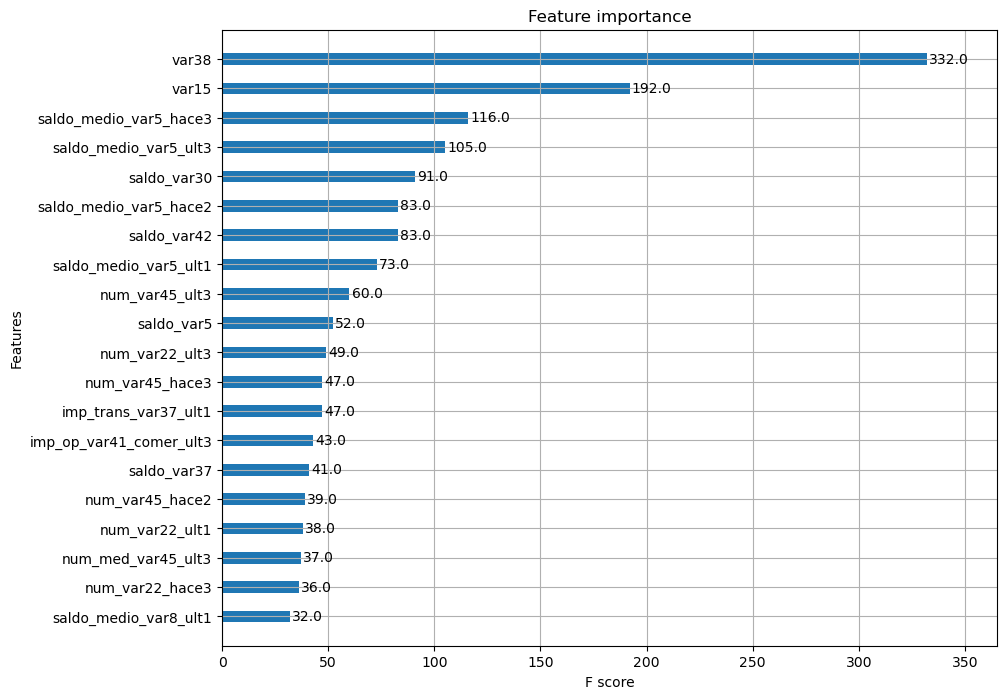

In [52]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

→ XGBoost의 예측 성능을 좌우하는 가장 중요한 피처는 var38, var15 순

#### 3. LightGBM 모델 학습과 하이퍼 파라미터 튜닝
앞의 XGBoost 예제 코드에서 만들어진 데이터 세트를 기반으로 LightGBM으로 학습을 수행하고, ROC-AUC를 측정
* n_estimator=500, early_stopping_rounds=100
* 앞에서 분리한 학습과 검증 데이터 세트를 이용하여 eval_set=\[(X_tr, y_tr), {X_val, y_val}] 으로 학습을 진행
* 테스트 데이터 세트로 평가된 ROC-AUC 값을 확인

In [53]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

→ LightGBM 수행 결과 ROC-AUC가 약 0.8384  
→ XGBoost보다 학습에 걸리는 시간이 좀 더 단축됐음

**HyperOpt를 이용하여 다양한 하이퍼 파라미터에 대한 튜닝을 수행**  
튜닝 대상은 num_leaves, max_depth, min_child_samples, subsample, learning_rate

**튜닝을 위해 하이퍼 파라미터 검색 공간 설정**

In [54]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

**목적 함수 생성**

In [55]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1 * np.mean(roc_auc_list)

**fmin()을 호출하여 최적 하이퍼 파라미터를 도출**

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's auc: 0.841859	training's binary_logloss: 0.151499	valid_1's auc: 0.814773	valid_1's binary_logloss: 0.154617
[9]	training

→ learning_rate가 약 0.08592, max_depth가 121.0, min_child_samples가 69.0, num_leaves가 41.0, subsample이 0.91489로 도출

**도출된 하이퍼 파라미터를 이용해 LightGBM 학습 후 테스트 데이터 세트에서 ROC-AUC를 평가**

In [57]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.831361	training's binary_logloss: 0.156294	valid_1's auc: 0.806483	valid_1's binary_logloss: 0.158715
[2]	training's auc: 0.838601	training's binary_logloss: 0.15083	valid_1's auc: 0.811773	valid_1's binary_logloss: 0.154507
[3]	training's auc: 0.848105	training's binary_logloss: 0.146815	valid_1's auc: 0.816877	valid_1's binary_logloss: 0.151293
[4]	training's auc: 0.851973	training's binary_logloss: 0.143629	valid_1's auc: 0.819909	valid_1's binary_logloss: 0.148714
[5]	training's auc: 0.856732	training's binary_logloss: 0.140963	valid_1's auc: 0.822219	valid_1's binary_logloss: 0.146675
[6]	training's auc: 0.85899	training's binary_logloss: 0.138758	valid_1's auc: 0.825534	valid_1's binary_logloss: 0.144992
[7]	training's auc: 0.860992	training's binary_logloss: 0.136897	valid_1's auc: 0.825534	valid_1's binary_logloss: 0.143674
[8]	training's auc: 0.862288	training's binary_logloss: 0.135247	valid_1's auc: 0.827324	valid_1's binary_logloss: 0.142438
[9]	traini

→ LightGBM의 경우 테스트 데이터 세트에서 ROC-AUC가 약 0.8446으로 측정됨  
→ LightGBM의 경우 학습 시간이 상대적으로 빠름

### **10. 분류 실습 - 캐글 신용카드 사기 검출**
* 해당 데이터 세트의 레이블인 Class 속성은 매우 **불균형한 분포**를 가지고 있음
  * Class는 0과 1로 분류되는데 0이 사기가 아닌 정상적인 신용카드 트랜잭션 데이터, 1은 신용카드 사기 트랜잭션을 의미함
  * 전체 데이터의 **약 0.172%만이 레이블 값이 1, 즉 사기 트랜잭션**

→ 일반적으로 사기 검출(Fraud Detection)이나 이상 검출(Anomaly Detection)과 같은 데이터 세트는 레이블 값이 극도로 불균형한 분포를 가지기 쉬움  
→ 사기와 같은 이상 현상은 전체 데이터에서 차지하는 비중이 매우 적을 수 밖에 없기 때문

#### 1. 언더 샘플링과 오버 샘플링의 이해
&nbsp;**레이블이 불균형한 분포**를 가진 데이터 세트를 학습시킬 때 **예측 성능의 문제**가 발생할 수 있는데, 이는 이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해 너무 적기 때문에 발생함. 즉, **이상 레이블을 가지는 데이터 건수**는 <u>매우 적기 때문에</u> 제대로 <u>다양한 유형을 학습하지 못하는 반면에</u> 정상 레이블을 가지는 데이터 건수는 매우 많기 때문에 일방적으로 **정상 레이블로 치우친 학습을 수행**해 제대로 된 이상 데이터 검출이 어려워지기 쉬움  

&nbsp;지도학습에서 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해 적절한 학습 데이터를 확보하는 방안을 사용

* <span style="background-color:#FFFF99"> **언더 샘플링** </span>: 많은 데이터 세트를 적은 데이터 세트 수준으로 **감소**시키는 방법
  * 정상 레이블 데이터를 이상 레이블 데이터 수준으로 너무 줄여 버린 상태에서 학습을 수행하면 과도하게 정상 레이블로 학습/예측하는 부작용을 개선할 수 있지만, 너무 많은 정상 레이블 데이터를 감소시켜서 정상 레이블의 경우 **제대로 된 학습을 수행할 수 없는 문제**가 발생할 수 있으므로 유의해야 함

* <span style="background-color:#FFFF99"> **오버 샘플링** </span>: 이상 데이터와 같이 적은 데이터 세트를 **증식**하여 학습을 위한 충분한 데이터를 확보하는 방법
  * 동일한 데이터를 단순히 증식하는 방법은 **과적합(Overfitting)** 이 되기 때문에 의미가 없으므로 원본 데이터의 피처 값들을 **아주 약간만 변경하여 증식함**
  * 대표적으로 **SMOTE(Synthetic Minority Over-sampling Technique) 방법**이 있음. SMOTE는 **적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃(K Nearest Neighbor)** 을 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 **기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성**하는 방식
  * SMOTE를 구현한 대표적인 파이썬 패키지는 **imbalanced-learn**

→ 오버 샘플링 방식이 예측 성능상 조금 유리한 경우가 많아 상대적으로 더 많이 사용됨

#### 2. 데이터 일차 가공 및 모델 학습/예측/평가
&nbsp;이번 실습에서는 보다 다양한 데이터 사전 가공을 수행하고, 이에 따른 예측 성능도 함께 비교

In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


→ V로 시작하는 피처들의 의미는 알 수 없음  
→ Time 피처의 경우 데이터 생성 관련한 작업용 속성으로서 큰 의미가 없으므로 제거  
→ Amount 피처는 신용카드 트랜잭션 금액을 의미  
→ Class는 레이블로서 **0의 경우 정상, 1의 경우 사기 트랜잭션**

→ <u>card_df.info()</u>로 확인해 보면 전체 284,807개의 레코드에서 **결측치는 없으며**, **Class 레이블만 int형** 이고 **나머지 피처들은 전부 float형**

**입력된 DataFrame을 복사한 뒤, 이를 가공하여 반환하는 get_preprocessed_df() 함수 생성**  
* 가공: 불필요한 Time 피처만 삭제

In [20]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

**데이터 가공 후 학습/테스트 데이터 세트를 반환하는 get_train_test_df() 함수를 생성**  
* get_preprocessed_df()를 호출한 뒤 **학습 피처/레이블 데이터 세트, 테스트 피처/레이블 데이터 세트**를 반환  
* 내부에서 <u>train_test_split() 함수</u>를 호출하며, 테스트 데이터 세트를 전체의 30%인 Stratified 방식으로 추출해 학습 데이터 세트와 테스트 데이터 세트의 **레이블 값 분포도를 서로 동일**하게 만듦

In [21]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

**생성한 학습/테스트 데이터 세트의 레이블 값 비율을 백분율로 환산해서 서로 비슷하게 분할됐는지 확인**

In [22]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


→ 학습 데이터 레이블의 경우 1값이 약 0.172%, 테스트 데이터 레이블의 경우 1값이 약 0.173%로 큰 차이가 없이 잘 분할됨

**로지스틱 회귀와 LightGBM 기반의 모델이 데이터 가공을 수행하면서 예측 성능이 어떻게 변하는지 확인**
1) **로지스틱 회귀** 기반 모델

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
 F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [24]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85283    12]
 [   64    84]]
정확도: 0.9991, 정밀도: 0.8750, 재현율: 0.5676, F1: 0.6885, AUC: 0.9566


→ 테스트 데이터 세트로 측정 시 재현율(Recall)이 0.5676, ROC-AUC가 0.9566

2) **LightGBM** 기반 모델

**앞으로 반복적으로 모델을 변경해 학습/예측/평가하기 위한 별도의 함수 get_model_train_eval()을 생성**  
: 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력받아서 학습/예측/평가를 수행하는 역할을 하는 함수

In [25]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

**LightGBM으로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 예측 평가를 수행**  
본 데이터 세트가 극도로 불균형한 레이블 값 분포도를 가지고 있으므로 LGBMClassifier 객체 생성 시 boost_from_average=False로 파라미터를 설정해야 함

In [26]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


→ 재현율 0.7568, ROC-AUC 0.9790으로 앞의 로지스틱 회귀보다는 높은 수치를 나타냄

#### 3. 데이터 분포도 변환 후 모델 학습/예측/평가
왜곡된 분포도를 가지는 데이터를 재가공한 뒤에 모델을 다시 테스트

**creditcard.csv의 중요 피처 값의 분포도 확인**
* 로지스틱 회귀는 선형 모델
  * 대부분의 선형 모델은 중요 피처들의 값이 정규 분포 형태를 유지하는 것을 선호함
* **Amount 피처**는 신용 카드 사용 금액으로 정상/사기 트랜잭션을 결정하는 매우 중요한 속성일 가능성이 높음

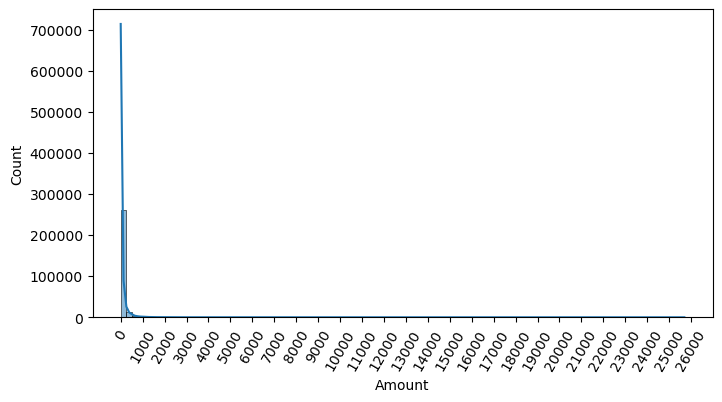

In [27]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

→ 카드 사용금액이 1000불 이하인 데이터가 대부분이며, 26,000불까지 드물지만 많은 금액을 사용한 경우가 발생하면서 꼬리가 긴 형태의 분포 곡선을 가지고 있음

**1) Amount를 표준 정규 분포 형태로 변환 - StandardScaler**

In [28]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

**로지스틱 회귀와 LightGBM 모델을 각각 학습 예측/평가**

In [29]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC: 0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500, F1: 0.8409, AUC: 0.9779


정규 분포 형태로 Amount 피처값을 변환한 후 테스트 데이터 세트에 적용한  
→ **로지스틱 회귀**의 경우는 정밀도와 재현율이 오히려 조금 저하됨  
→ **LightGBM**의 경우는 정밀도와 재현율이 약간 저하되었지만 큰 성능상의 변경은 없음

**2) Amount에 대해 이번에는 StandardScaler가 아니라 로그 변환**
* 로그 변환은 데이터의 분포도가 심하게 왜곡되어 있을 경우 적용하는 중요 기법 중 하나
* 원래 값을 log 값으로 변환해 원래 큰 값을 **상대적으로 작은 값**으로 변환하기 때문에 **데이터 분포도의 왜곡을 상당 수준 개선**해 줌
* 로그 변환은 넘파이의 **loglp() 함수** 를 이용해 간단히 변환 가능

In [30]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

**로지스틱 회귀와 LightGBM 모델을 각각 학습 예측/평가**

In [31]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, AUC: 0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1: 0.8496, AUC: 0.9796


→ **로지스틱 회귀**의 경우 원본 데이터 대비 정밀도는 향상되었지만 재현율은 저하되었음  
→ **LightGBM**의 경우 재현율이 향상되었음  
→ **레이블이 극도로 불균일한 데이터 세트에서 로지스틱 회귀는 데이터 변환 시 약간은 불안정한 성능 결과를 보여주고 있음**

#### 4. 이상치 데이터 제거 후 모델 학습/예측/평가
* **이상치 데이터(Outlier)**: 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터
* 이상치로 인해 머신러닝 모델의 성능에 영향을 받는 경우가 발생하기 쉬움

> 이상치를 찾는 방법 - **IQR(Inter Quantile Range) 방식**
* **사분위(Qunatile) 값의 편차**를 이용하는 기법  
  * 사분위는 전체 데이터를 값이 높은 순으로 정렬하고, 이를 1/4(25%)씩으로 구간을 분할하는 것을 지칭
  * **<u>25% 구간인 Q1</u> ~ <u>75% 구간인 Q3</u>의 범위를 IQR이라 함**
* 보통 IQR에 **1.5**를 곱해서 생성된 범위를 이용해 최댓값과 최솟값을 결정한 뒤 **최댓값을 초과하거나 최솟값에 미달하는 데이터를 이상치로 간주함**
  * 3/4 분위수(Q3)에 IQR * 1.5를 더해서 일반적인 데이터가 가질 수 있는 최댓값으로 가정
  * 1/4 분위수(Q1)에 IQR * 1.5를 빼서 일반적인 데이터가 가질 수 있는 최솟값으로 가정
  * 경우에 따라 1.5가 아닌 다른 값을 적용할 수도 있으며, 보통은 1.5를 적용
* 흔히 **박스 플롯(Box plot) 방식**으로 시각화 가능

**이상치 데이터를 IQR을 이용해 제거**
* 먼저 **어떤 피처의 이상치 데이터를 검출할 것인지 선택**이 필요함.
  * 매우 많은 피처가 있을 경우 이들 중 **결정값(즉, 레이블)과 가장 상관성이 높은 피처**들을 위주로 이상치를 검출하는 것이 좋음
  * 모든 피처들의 이상치를 검출하는 것은 시간이 많이 소모됨
  * 결정값과 상관성이 높지 않은 피처들의 경우는 이상치를 제거하더라도 크게 성능 향상에 기여하지 않기 때문

**DataFrame의 corr()을 이용해 각 피처별로 <u>상관도</u>를 구한 뒤 <u>시본의 heatmap을 통해 시각화</u>**  
→ 상관관계 히트맵에서 cmap을 <u>'RdBu'</u>로 설정해 **양의 상관관계**가 높을수록 색깔이 **진한 파란색**에 가까움  
→ **음의 상관관계**가 높을수록 색깔이 **진한 빨간색**에 가깝게 표현됨

<Axes: >

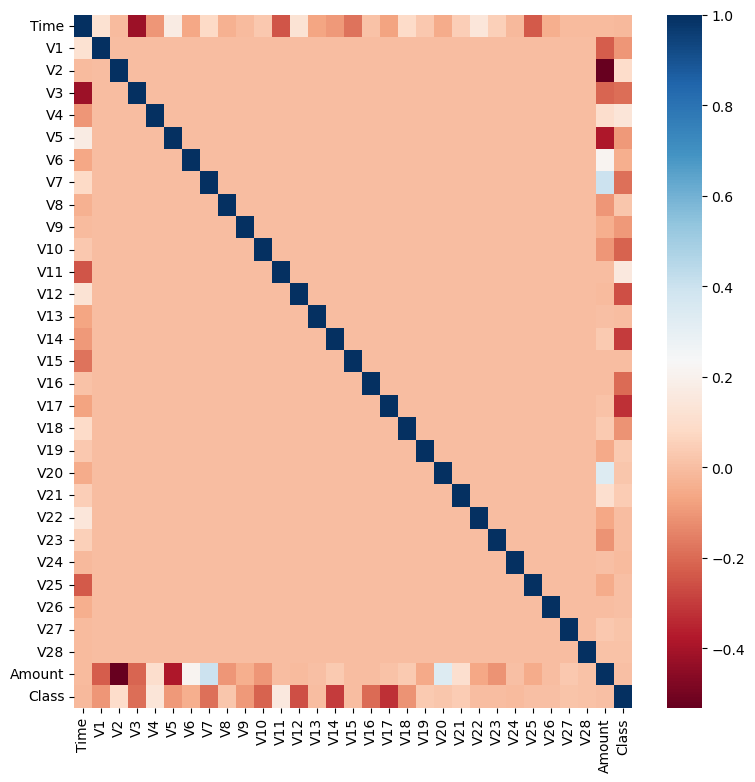

In [32]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

→ 상관관계 히트맵에서 맨 아래에 위치한 결정 레이블인 Class 피처와 음의 상관관계가 가장 높은 피처는 V14와 V17  
→ 이중 V14에 대해서만 이상치를 찾아서 제거

**IQR을 이용해 이상치를 검출하는 함수를 생성**
* **get_outlier() 함수**는 인자로 DataFrame과 이상치를 검출한 칼럼을 입력받음
* 함수 내에서 넘파이의 **percentile()** 을 이용해 1/4 분위와 3/4 분위를 구하고, 이에 기반해 IQR을 계산
* 계산된 IQR에 1.5를 곱해서 최댓값과 최솟값 지점을 구한 뒤, 최댓값보다 크거나 최솟값보다 작은 값을 이상치로 설정
* 해당 이상치가 있는 DataFrame Index를 반환

In [33]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

**V14에서 검출된 이상치를 삭제**

In [34]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


→ 총 4개의 데이터인 8296, 8615, 9035, 9252번 Index가 이상치로 추출됨

**이상치를 추출하고 삭제하는 로직을 get_processed_df() 함수에 추가해 데이터를 가공한 뒤 로지스틱 회귀와 LightGBM 모델을 다시 적용**

In [35]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC: 0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC: 0.9780


→ 이상치 데이터를 제거한 뒤, 로지스틱 회귀와 LightGBM 모두 **예측 성능이 크게 향상됨**  
→ **로지스틱 회귀**의 경우 재현율이 60.14%에서 67.12%로 크게 증가  
→ **LightGBM**의 경우도 재현율이 76.35%에서 82.88%로 크게 증가

#### 5. SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
SMOTE 기법으로 오버 샘플링을 적용한 뒤 로지스틱 회귀와 LightGBM 모델의 예측 성능을 평가
* SMOTE는 imbalanced-learn 패키지의 SMOTE 클래스를 이용해 간단하게 구현 가능

* SMOTE를 적용할 때는 반드시 **학습 데이터 세트만 오버 샘플링**을 해야 함
* 검증/테스트 데이터 세트를 오버 샘플링할 경우 결국은 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 테스트를 수행하기에 올바른 검증/테스트가 될 수 없음

**앞서 생성한 학습 피처/레이블 데이터를 SMOTE 객체의 fit_resample() 메소드를 이용해 증식한 뒤 증식 전과 비교**

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


→ SMOTE 적용 전 학습 데이터 세트는 199,362건이었지만 SMOTE 적용 후 2배에 가까운 398,040건으로 데이터가 증식됨  
→ SMOTE 적용 후 레이블 값이 0과 1의 분포가 동일하게 199,020건으로 생성됨

**생성된 학습 데이터 세트를 기반으로 로지스틱 회귀 모델을 학습한 뒤 성능 평가**

In [37]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247, F1: 0.1023, AUC: 0.9737


→ 로지스틱 회귀의 경우 SMOTE로 오버 샘플링된 데이터로 학습할 경우,  
→ 재현율이 92.47%로 크게 증가하지만  
→ 반대로 정밀도가 5.4로 급격하게 저하됨 (현실 업무에 적용할 수 없는 수준)  

**→ 이는 로지스틱 회귀 모델이 오버 샘플링으로 인해 실제 원본 데이터의 유형보다 너무나 많은 Class=1 데이터를  
&nbsp;&nbsp;학습하면서 실제 테스트 데이터 세트에서 예측을 지나치게 Class=1로 적용해 정밀도가 급격히 떨어지게 된 것임**

**분류 결정 임곗값에 따른 정밀도와 재현율 곡선을 통해 SMOTE로 학습된 로지스틱 회귀 모델에 발생하는 문제를 시각화**

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

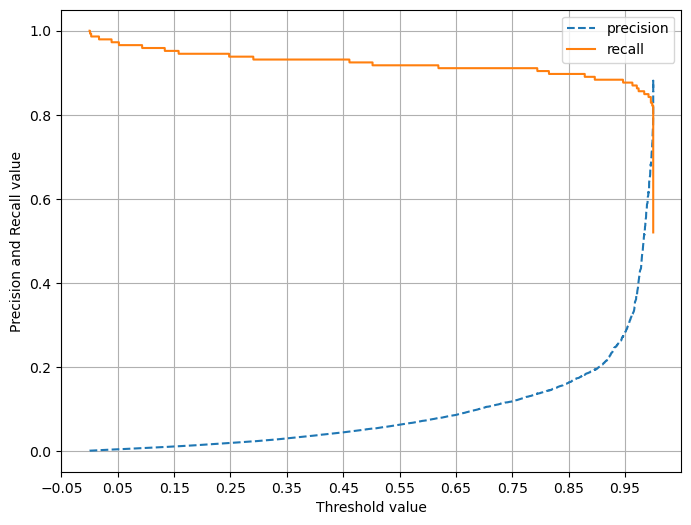

In [39]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

→ 임곗값이 0.99 이하에서는 재현율이 매우 좋고 정밀도가 극단적으로 낮다가 0.99 이상에서는 반대로 재현율이 대폭 떨어지고 정밀도가 높아짐  
→ 분류 결정 임곗값을 조정하더라도 임곗값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없음  
→ 이에 로지스틱 회귀 모델의 경우, SMOTE 적용 후 올바른 예측 모델이 생성되지 못함

**LightGBM 모델을 SMOTE로 오버 샘플링된 데이터 세트로 학습/예측/평가를 수행**

In [40]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493, F1: 0.8794, AUC: 0.9814


→ 재현율이 이상치만 제거한 경우인 82.88%보다 높은 84.93%가 되었음  
→ 그러나 정밀도는 이전의 96.03%보다 낮은 91.18%

→ **SMOTE를 적용하면 재현율은 높아지나, 정밀도는 낮아지는 것이 일반적**  
→ 때문에 **정밀도 지표보다는 재현율 지표를 높이는 것이 머신러닝 모델의 주요한 목표**인 경우 **SMOTE를 적용**하면 좋음  
→ 좋은 SMOTE 패키지일수록 재현율 증가율은 높아지고, 정밀도 감소율은 낮출 수 있도록 효과적으로 데이터를 증식함

### **11. 스태킹 앙상블**
* **스태킹(Stacking)** 이 개별적인 **여러 알고리즘을 서로 결합**해 예측 결과를 도출한다는 점은 배깅 및 부스팅과 같음
* 가장 큰 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행하는다는 것. 즉, 개별 알고리즘의 예측 결과 데이터 세트를 **최종적인 메타 데이터 세트**로 만들어 별도의 ML 알고리즘으로 **최종 학습을 수행**하고 테스트 데이터를 기반으로 **다시 최종 예측을 수행**하는 방식
  * 개별 모델의 예측된 데이터 세트를 다시 기반으로 하여 학습하고 예측하는 방식을 메타 모델이라 함

* 스태킹 모델은 두 종류의 모델이 필요함
  * 개별적인 **기반 모델**
  * 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 **최종 메타 모델**

* 스태킹을 현실 모델에 적용하는 경우는 그렇게 많지 않지만, 캐글과 같은 대회에서 높은 순위를 차지하기 위해 조금이라도 성능 수치를 높여야 할 경우 자주 사용됨
* 스태킹을 적용할 때는 많은 개별 모델이 필요함
* 일반적으로 성능이 비슷한 모델을 결합해 좀 더 나은 성능 향상을 도출하기 위해 적용

> M개의 로우, N개의 피처(칼럼)를 가진 데이터 세트에 스태킹 앙상블을 적용한다고 가정한다. 학습에 사용할 ML 알고리즘 모델은 모두 3개이다. 먼저 모델별로 각각 학습을 시킨 뒤 예측을 수행하면 M개의 로우를 가진 1개의 레이블 값을 도출할 것이다. 모델별로 도출된 예측 레이블 값을 다시 합해서(스태킹) 새로운 데이터 세트를 만들고 이렇게 스태킹된 데이터 세트에 대해 최종 모델을 적용해 최종 예측을 하는 것이 스태킹 앙상블 모델이다.

#### 1. 기본 스태킹 모델
기본 스태킹 모델을 위스콘신 암 데이터 세트에 적용

**데이터를 로딩하고 학습/테스트 데이터 세트로 분리**

In [41]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

**스태킹에 사용될 머신러닝 알고리즘 클래스를 생성하고 개별 모델들을 학습**  
→ 개별 모델은 KNN, 랜덤 포레스트, 결정 트리, 에이다부스트  
→ 개별 모델의 예측 결과를 합한 데이터 세트로 학습/예측하는 최종 모델은 로지스틱 회귀

In [42]:
# 개별 ML 모델 생성
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습/예측할 최종 모델
lr_final = LogisticRegression(C=10)

In [43]:
# 개별 모델들을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

**개별 모델의 예측 데이터 세트를 반환하고 각 모델의 예측 정확도를 확인**

In [44]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561 :


**개별 알고리즘으로부터 예측된 예측값을 칼럼 레벨로 옆으로 붙여서 피처 값으로 만듦**  
→ 이를 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용할 것  
→ 반환된 예측 데이터 세트는 1차원 형태의 ndarray 이므로 먼저 반환된 예측 결과를 행 형태로 붙인 뒤,  
→ 넘파이의 transpose()를 이용해 행과 열 위치를 바꾼 ndarray로 변환

In [45]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


**예측 데이터로 생성된 데이터 세트를 기반으로 최종 메타 모델인 로지스틱 회귀를 학습하고 예측 정확도를 측정**

In [46]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


→ 정확도가 97.37%로 개별 모델 정확도보다 향상되었음  
(물론 스태킹 기법으로 예측을 한다고 무조건 개별 모델보다는 좋아진다는 보장은 없음)

#### 2. CV 세트 기반의 스태킹
* 앞 예제에서 마지막에 메타 모델인 로지스틱 회귀 모델 기반에서 최종 학습할 때 레이블 데이터 세트로 학습 데이터가 아닌 테스트용 레이블 데이터 세트를 기반으로 학습했기에 과적합 문제가 발생할 수 있음
* CV 세트 기반의 스태킹은 이와 같은 **과적합 개선**을 위해 **개별 모델들이 각각 교차 검증**으로 **메타 모델을 위한 학습용 스태킹 데이터 생성**과 **예측을 위한 테스트용 스태킹 데이터**를 생성한 뒤 이를 기반으로 **메타 모델이 학습과 예측을 수행함**
  * Step 1: 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 **교차 검증을 통해** 생성
  * Step 2:
    1) Step 1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 **메타 모델이 학습할 최종 학습용 데이터 세트**를 생성함.
    2) 마찬가지로 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐서 **메타 모델이 예측할 최종 테스트 데이터 세트**를 생성함.
    3) **메타 모델**은 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터와 레이블 데이터를 기반으로 **학습**한 뒤,
    4) 최종적으로 생성된 테스트 데이터 세트를 **예측**하고, 원본 테스트 데이터의 레이블 데이터를 기반으로 **평가**함

* **Step 1**
  1) 학습용 데이터를 N개의 폴드(Fold)로 나누되, (N-1)개의 폴드는 학습을 위한 데이터 폴드로, 나머지 1개의 폴드는 검증을 위한 데이터 폴드로 나눔
  2) N개의 폴드로 나뉜 학습 데이터를 기반으로 개별 모델을 학습시킴
  3) 학습된 개별 모델은 검증 폴드 1개 데이터로 예측하고 그 결과를 저장함
  4) 2~3의 로직을 N번 반복하면서 학습 데이터와 검증 데이터 세트를 변경해가면서 학습 후 <u>예측 결과를 별도로 저장</u>함
  5) 이렇게 만들어진 **예측 데이터는 메타 모델을 학습시키는 학습 데이터**로 사용됨
  6) (N-1)개의 학습 폴드 데이터로 <u>학습된 개별 모델</u>은 원본 테스트 데이터를 예측하여 <u>예측 값을 생성함</u>
  7) 마찬가지로 이러한 로직을 N번 반복하면서 이 **예측 값의 평균으로 최종 결괏값을 생성하고 이를 메타 모델을 위한 테스트 데이터**로 사용

* **Step 2**
  1) 각 모델들이 Step 1로 생성한 학습과 테스트 데이터를 모두 합쳐서 최종적으로 메타 모델이 사용할 학습 데이터와 테스트 데이터를 생성함
  2) 메타 모델이 사용할 **최종 학습 데이터와 원본 데이터의 레이블 데이터를 합쳐서** 메타 모델을 학습함
  3) **최종 테스트 데이터**로 예측을 수행함
  4) 최종 예측 결과를 **원본 테스트 데이터의 레이블 데이터**와 비교해 평가함

**개별 모델이 메타 모델을 위한 학습용 데이터 세트와 테스트 데이터 세트를 생성하는 과정 구현 (Step 1)**

**1. get_stacking_base_datasets() 함수를 생성**
* 개별 모델의 Classifier 객체, 원본인 학습용 피처/레이블 데이터, 원본인 테스트용 피처 데이터, 그리고 K 폴드를 몇 개로 할지를 파라미터로 입력받음
* 함수 내에서는 폴드의 개수만큼 반복을 수행하면서 폴드된 학습용 데이터로 학습한 뒤 예측 결괏값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성

In [47]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

**2. 여러 개의 분류 모델별로 stack_base_model() 함수를 수행 (Step 1)**
* 개별 모델은 앞의 기본 스태킹 모델에서 생성한 KNN, 랜덤 포레스트, 결정 트리, 에이다부스트 모델
* 이들 모델별로 get_stacking_base_datasets() 함수를 호출해 각각 메타 모델이 추후에 사용할 학습용/테스트용 데이터 세트를 반환

In [48]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


**반환된 각 모델별 학습 데이터와 테스트 데이터를 합침 (Step 2)**
* 넘파이의 concatenate()를 이용해 쉽게 기능을 수행
  * 여러 개의 넘파이 배열을 칼럼 또는 로우 레벨로 합쳐주는 기능을 제공
* Stack_final_X_train은 **메타 모델이 학습할 학습용 피처 데이터 세트**
* Stack_final_X_test는 **메타 모델이 예측할 테스트용 피처 데이터 세트**
* 스태킹 학습 피처 데이터는 원본 학습 피처 데이터와 로우(Row) 크기는 같으며, 4개의 개별 모델 예측 값을 합친 것이므로 칼럼(Column) 크기는 4

In [51]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


**최종 메타 모델인 로지스틱 회귀를 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습한 후에  
스태킹된 테스트 데이터 세트로 예측하고, 예측 결과를 원본 테스트 레이블 데이터와 비교해 정확도를 측정**

In [50]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


→ 최종 메타 모델의 예측 정확도는 약 97.37%로 측정됨  
→ 스태킹을 이루는 개별 모델은 최적으로 파라미터를 튜닝한 상태에서 스태킹 모델을 만드는 것이 일반적  
→ 스태킹 모델은 분류(Classification)뿐만 아니라 회귀(Regression)에도 적용 가능함